In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img_size=256
bch_size=32

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("plant_village_1",shuffle=True,image_size=(img_size,img_size),batch_size=bch_size)

Found 4627 files belonging to 5 classes.


In [4]:
class_names=dataset.class_names

In [5]:
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [7]:
channels=3
epochs=35

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [9]:
train,val,test=get_dataset_partitions_tf(dataset)

In [17]:
train=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [18]:
input_shape=(bch_size,img_size,img_size,channels)
n_classes=5

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [19]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [15]:
tf.config.experimental.set_memory_growth

<function tensorflow.python.framework.config.set_memory_growth(device, enable)>

In [20]:
history=model.fit(train,
         epochs=epochs,
         batch_size=bch_size,
         verbose=1,
         validation_data=val)

Epoch 1/35
116/116 [==============================] - 240s 2s/step - loss: 1.3312 - accuracy: 0.3942 - val_loss: 1.0901 - val_accuracy: 0.5424
Epoch 2/35
116/116 [==============================] - 223s 2s/step - loss: 0.8326 - accuracy: 0.6634 - val_loss: 0.6202 - val_accuracy: 0.7455
Epoch 3/35
116/116 [==============================] - 218s 2s/step - loss: 0.5276 - accuracy: 0.8137 - val_loss: 0.3322 - val_accuracy: 0.8616
Epoch 4/35
116/116 [==============================] - 218s 2s/step - loss: 0.3121 - accuracy: 0.8886 - val_loss: 0.2730 - val_accuracy: 0.8996
Epoch 5/35
116/116 [==============================] - 218s 2s/step - loss: 0.2222 - accuracy: 0.9257 - val_loss: 0.2299 - val_accuracy: 0.9107
Epoch 6/35
116/116 [==============================] - 216s 2s/step - loss: 0.1707 - accuracy: 0.9446 - val_loss: 0.1272 - val_accuracy: 0.9509
Epoch 7/35
116/116 [==============================] - 218s 2s/step - loss: 0.2310 - accuracy: 0.9240 - val_loss: 0.3676 - val_accuracy: 0.8817

In [18]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


In [23]:
model.save("5class.h5")

In [24]:
scores=model.evaluate(test)

15/15 [==============================] - 10s 316ms/step - loss: 0.0559 - accuracy: 0.9786


In [25]:
history.history['accuracy']

[0.39416059851646423,
 0.6634225249290466,
 0.8137334585189819,
 0.888618528842926,
 0.9256556034088135,
 0.9445796012878418,
 0.924033522605896,
 0.9521492123603821,
 0.9518789052963257,
 0.9651256799697876,
 0.9548526406288147,
 0.9529602527618408,
 0.9726953506469727,
 0.979183554649353,
 0.9664774537086487,
 0.9702622294425964,
 0.9735063314437866,
 0.9789132475852966,
 0.9578264355659485,
 0.9551230072975159,
 0.9670181274414062,
 0.974047064781189,
 0.9845904111862183,
 0.9799945950508118,
 0.9797242283821106,
 0.9805352687835693,
 0.970802903175354,
 0.9797242283821106,
 0.9835090637207031,
 0.9816166758537292,
 0.9753987789154053,
 0.9883752465248108,
 0.9872938394546509,
 0.9672884345054626,
 0.9799945950508118]

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

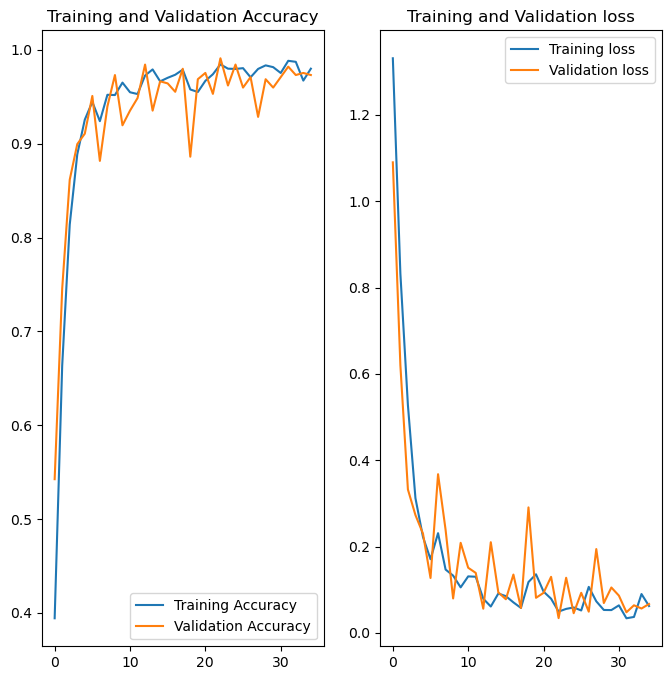

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training Accuracy')
plt.plot(range(epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training loss')
plt.plot(range(epochs),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

first image to predict
first image's actual label: Pepper__bell___Bacterial_spot
1/1 [==============================] - 1s 633ms/step
predicted label: Pepper__bell___Bacterial_spot


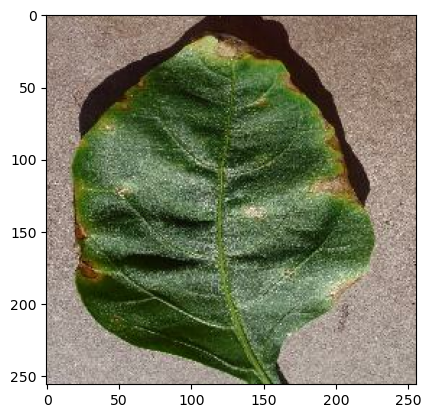

In [28]:
for images_batch,labels_batch in test.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [29]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #create a batch
    
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 30ms/step


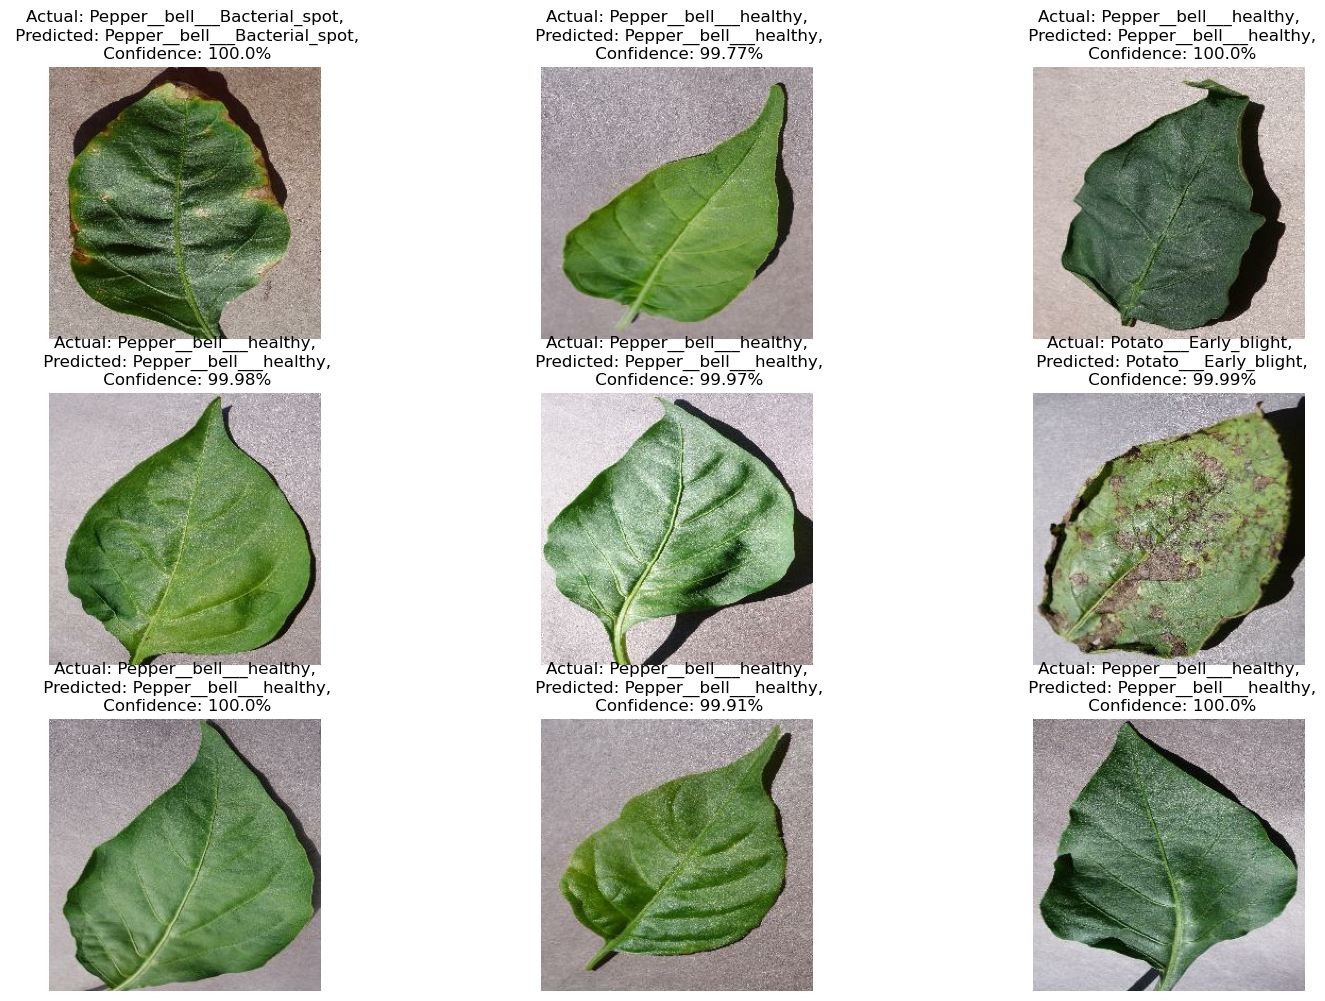

In [30]:
for images,labels in test.take(1):
    plt.figure(figsize=(18,12))
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")